# Import Python Packageses

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error as mse

brownian_path = f'brownian.npy'

In [2]:
# function to generate Brownian motions
def Brownian(N):
    dt = 1./N                                           # time step
    b = np.random.normal(0., 1., int(N))*np.sqrt(dt)    # brownian increments
    W = np.cumsum(b)                                    # brownian path
    return W

# function to calculate daily returns of stock
def daily_return(data):
    returns = []
    for i in range(0, len(data)-1):
        today = data[i+1]
        yesterday = data[i]
        daily_return = (today - yesterday)/yesterday
        returns.append(daily_return)
    return returns

# function to generate geometric Brownian motions
def GBM(So, mu, sigma, W):    
    t = np.linspace(0., 1., len(W)+1)
    S = []
    S.append(So)
    for i in range(1, len(W)+1):
        drift = (mu - 0.5 * sigma**2) * t[i]
        diffusion = sigma * W[i-1]
        S_temp = So*np.exp(drift + diffusion)
        S.append(S_temp)
    return S

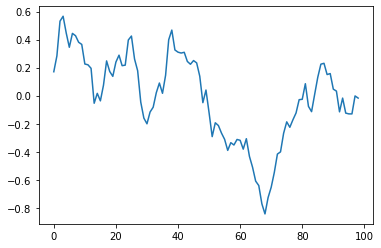

In [3]:
#length of the time series
N = 100 
# generate a brownian motion
#W = Brownian(N)
#np.save(brownian_path, W)
W = np.load(brownian_path)
plt.plot(W)

# Loading dataset

In [4]:
df = pd.read_csv("TESLA.csv")
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2013-09-03,173.699997,166.399994,173.399994,168.940002,12061100,168.940002
1,2013-09-04,171.619995,165.559998,169.770004,170.619995,11475700,170.619995
2,2013-09-05,171.500000,168.250000,170.100006,169.929993,6685300,169.929993
3,2013-09-06,169.699997,165.149994,168.570007,166.970001,8619700,166.970001
4,2013-09-09,164.500000,158.509995,163.119995,160.699997,14344500,160.699997
...,...,...,...,...,...,...,...
1337,2018-12-24,314.500000,295.200012,313.500000,295.390015,5559900,295.390015
1338,2018-12-26,326.970001,294.089996,300.000000,326.089996,8163100,326.089996
1339,2018-12-27,322.170013,301.500000,319.839996,316.130005,8575100,316.130005
1340,2018-12-28,336.239990,318.410004,323.100006,333.869995,9939000,333.869995


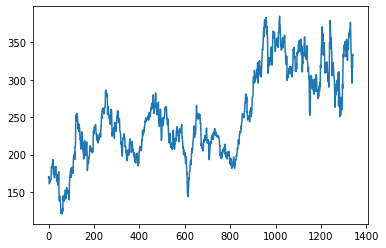

In [5]:
# plot the whole financial time series
adj_close = df['Adj Close']
data_np = adj_close.to_numpy()
data_np = data_np.reshape(-1, 1)
plt.plot(data_np)

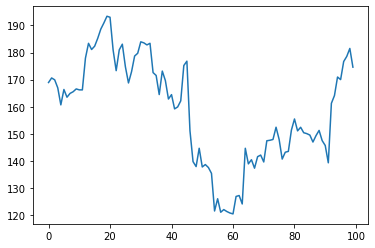

In [6]:
# plot the chosen time series
y = data_np[:N]
plt.plot(y)

###  Simulating for the first time using the GBM model   ###

In [7]:
returns1 = daily_return(y)
mu1 = np.mean(returns1)*252.           # drift coefficient
sig1 = np.std(returns1)*np.sqrt(252.)  # diffusion coefficient
print(mu1, sig1)
so = y[0]                              # Initial AMZN stock price (01/01/2016)
y1 = GBM(so, mu1, sig1, W)             # Exact solution

0.2945400410349627 0.6527135126144201


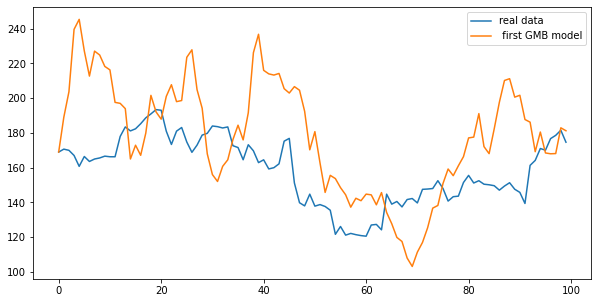

In [8]:
# plot real and predicted time series
plt.figure(figsize=(10, 5))
plt.plot(y, label = 'real data')
plt.plot(y1, label = ' first GMB model')
plt.legend()

###  Simulating for the second time using the GBM model   ###

In [9]:
returns2 = daily_return(y1)
mu2 = np.mean(returns2)*252.           # drift coefficient
sig2 = np.std(returns2)*np.sqrt(252.)  # diffusion coefficient
print(mu2, sig2)
y2 = GBM(so, mu2, sig2, W)

0.7300761952150467 1.053349963040641


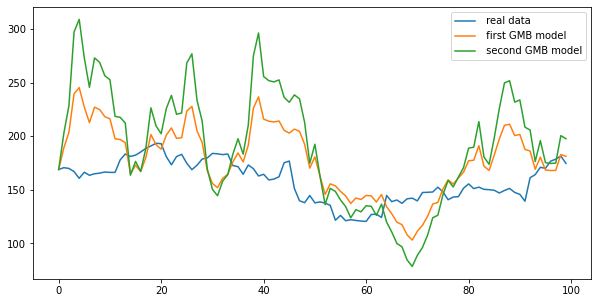

In [10]:
# plot real and predicted time series
plt.figure(figsize=(10, 5))
plt.plot(y, label = ' real data')
plt.plot(y1, label = ' first GMB model')
plt.plot(y2, label = ' second GMB model')
plt.legend()

###  Simulating for the third time using the GBM model   ###

In [11]:
returns3 = daily_return(y2)
mu3 = np.mean(returns3)*252.           # drift coefficient
sig3 = np.std(returns3)*np.sqrt(252.)  # diffusion coefficient
print(mu3, sig3)
y3 = GBM(so, mu3, sig3, W)

1.8397832758384212 1.7093896612545132


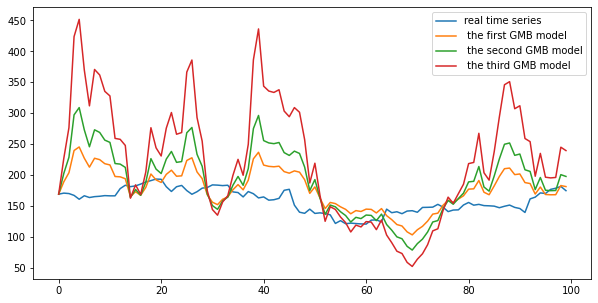

In [12]:
# plot real and predicted time series
plt.figure(figsize=(10, 5))
plt.plot(y, label = 'real time series')
plt.plot(y1, label = ' the first GMB model')
plt.plot(y2, label = ' the second GMB model')
plt.plot(y3, label = ' the third GMB model')
plt.legend()

###  Simulating for the fourth time using the GBM model   ###

In [13]:
returns4 = daily_return(y3)
mu4 = np.mean(returns4)*252.           # drift coefficient
sig4 = np.std(returns4)*np.sqrt(252.)  # diffusion coefficient
print(mu4, sig4)
y4 = GBM(so, mu4, sig4, W)

4.70594498212315 2.8139775570865586


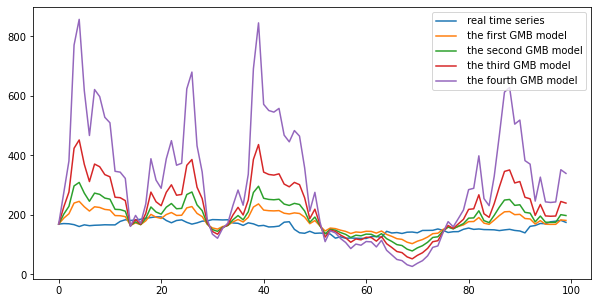

In [14]:
# plot real and predicted time series
plt.figure(figsize=(10, 5))
plt.plot(y, label = ' real time series')
plt.plot(y1, label = ' the first GMB model')
plt.plot(y2, label = ' the second GMB model')
plt.plot(y3, label = ' the third GMB model')
plt.plot(y4, label = ' the fourth GMB model')
plt.legend()

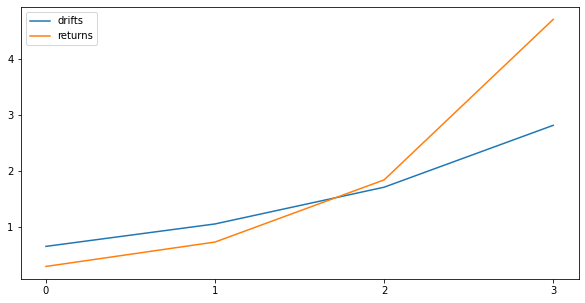

In [15]:
mu = [mu1, mu2, mu3, mu4]
sig = [sig1, sig2, sig3, sig4]

plt.figure(figsize=(10, 5))
plt.plot(sig, label = 'drifts')
plt.plot(mu, label = 'returns')
plt.xticks(domain)
plt.legend()